In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "legend.fontsize": 10,
})

def _setup_legend(ax, n_columns=5):
    """统一的图例设置辅助函数"""
    ax.legend(
        title='Class',
        loc='upper center',             # 图例的锚点：上边缘居中
        bbox_to_anchor=(0.5, -0.2),     # 放置位置：X轴中心(0.5)，Y轴下方(-0.2)
        ncol=n_columns,                 # 分5列
        borderaxespad=0.,
        frameon=False,
        columnspacing=1.0,              # 列间距
        handletextpad=0.5               # 图标与文字间距
    )

def pca_visualization(
    X, y,
    n_components=2,
    save_name=None,
    figsize=(6, 5),
):
    """
    Args:
        iterable_data: {"label": [data_items]}
        n_components: 2 or 3
        save_name: filename string (e.g., 'pca_result.pdf')
    Returns:
        fig, ax
    """
    unique_labels = np.unique(y)

    # PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # 颜色 & marker：tab10 比较适合类别型
    cmap = plt.get_cmap("tab10", len(unique_labels))
    markers = ['o', '^', 's', 'D', 'P', 'X', '*', 'v', '<', '>']

    fig = plt.figure(figsize=figsize, dpi=300)

    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        for idx, label in enumerate(unique_labels):
            mask = (y == label)
            ax.scatter(
                X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2],
                s=16,
                alpha=0.75,
                color=cmap(idx),
                marker=markers[idx % len(markers)],
                edgecolors='black',
                linewidths=0.3,
                label=str(label),
            )
        ax.set_zlabel('PC3')
    else:
        ax = fig.add_subplot(111)
        for idx, label in enumerate(unique_labels):
            mask = (y == label)
            ax.scatter(
                X_pca[mask, 0], X_pca[mask, 1],
                s=16,
                alpha=0.75,
                color=cmap(idx),
                marker=markers[idx % len(markers)],
                edgecolors='black',
                linewidths=0.3,
                label=str(label),
            )

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(f'PCA ({n_components}D) latent space')

    # 网格 + 去掉顶部和右侧坐标轴，更“论文化”
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    # legend 放在外面，避免遮挡
    ax.legend(
        title='Class',
        loc='upper left',
        bbox_to_anchor=(1.02, 1.0),
        borderaxespad=0.,
        frameon=False
    )

    # fig.tight_layout()
    _setup_legend(ax, n_columns=5)
    if save_name:
        fig.savefig(
            save_name,
            dpi=300,
            bbox_inches='tight',
            transparent=False,
        )

    return fig, ax
def t_sne_visualization(
    X, y,
    n_components=2,
    save_name=None,
    figsize=(6, 5),
    perplexity=30,
):
    """
    Args:
        iterable_data: {"label": [data_items]}
        n_components: 2 or 3
        save_name: filename string (e.g., 'tsne_result.pdf')
    Returns:
        fig, ax
    """
    unique_labels = np.unique(y)

    # 根据样本数量稍微调一下 perplexity，避免太小数据还用 30
    n_samples = X.shape[0]
    effective_perplexity = min(perplexity, max(5, (n_samples - 1) // 3))

    tsne = TSNE(
        n_components=n_components,
        random_state=42,
        max_iter=1000,
        perplexity=effective_perplexity,
        init='pca',
        learning_rate='auto',
    )
    X_tsne = tsne.fit_transform(X)

    cmap = plt.get_cmap("tab10", len(unique_labels))
    markers = ['o', '^', 's', 'D', 'P', 'X', '*', 'v', '<', '>']

    fig = plt.figure(figsize=figsize, dpi=300)

    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        for idx, label in enumerate(unique_labels):
            mask = (y == label)
            ax.scatter(
                X_tsne[mask, 0], X_tsne[mask, 1], X_tsne[mask, 2],
                s=16,
                alpha=0.8,
                color=cmap(idx),
                marker=markers[idx % len(markers)],
                edgecolors='black',
                linewidths=0.3,
                label=str(label),
            )
        ax.set_zlabel('t-SNE 3')
    else:
        ax = fig.add_subplot(111)
        for idx, label in enumerate(unique_labels):
            mask = (y == label)
            ax.scatter(
                X_tsne[mask, 0], X_tsne[mask, 1],
                s=16,
                alpha=0.8,
                color=cmap(idx),
                marker=markers[idx % len(markers)],
                edgecolors='black',
                linewidths=0.3,
                label=str(label),
            )

    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_title(f't-SNE ({n_components}D) latent space')

    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    ax.legend(
        title='Class',
        loc='upper left',
        bbox_to_anchor=(1.02, 1.0),
        borderaxespad=0.,
        frameon=False
    )

    # fig.tight_layout()
    _setup_legend(ax, n_columns=5)
    if save_name:
        fig.savefig(
            save_name,
            dpi=300,
            bbox_inches='tight',
            transparent=False,
        )

    return fig, ax


In [2]:
X_normal = np.load("visualize/normal_latent.npy")
X_noise = np.load("visualize/noise_latent.npy")

y_normal = np.load("visualize/normal_label.npy")
y_noise = np.load("visualize/noise_label.npy")


[]

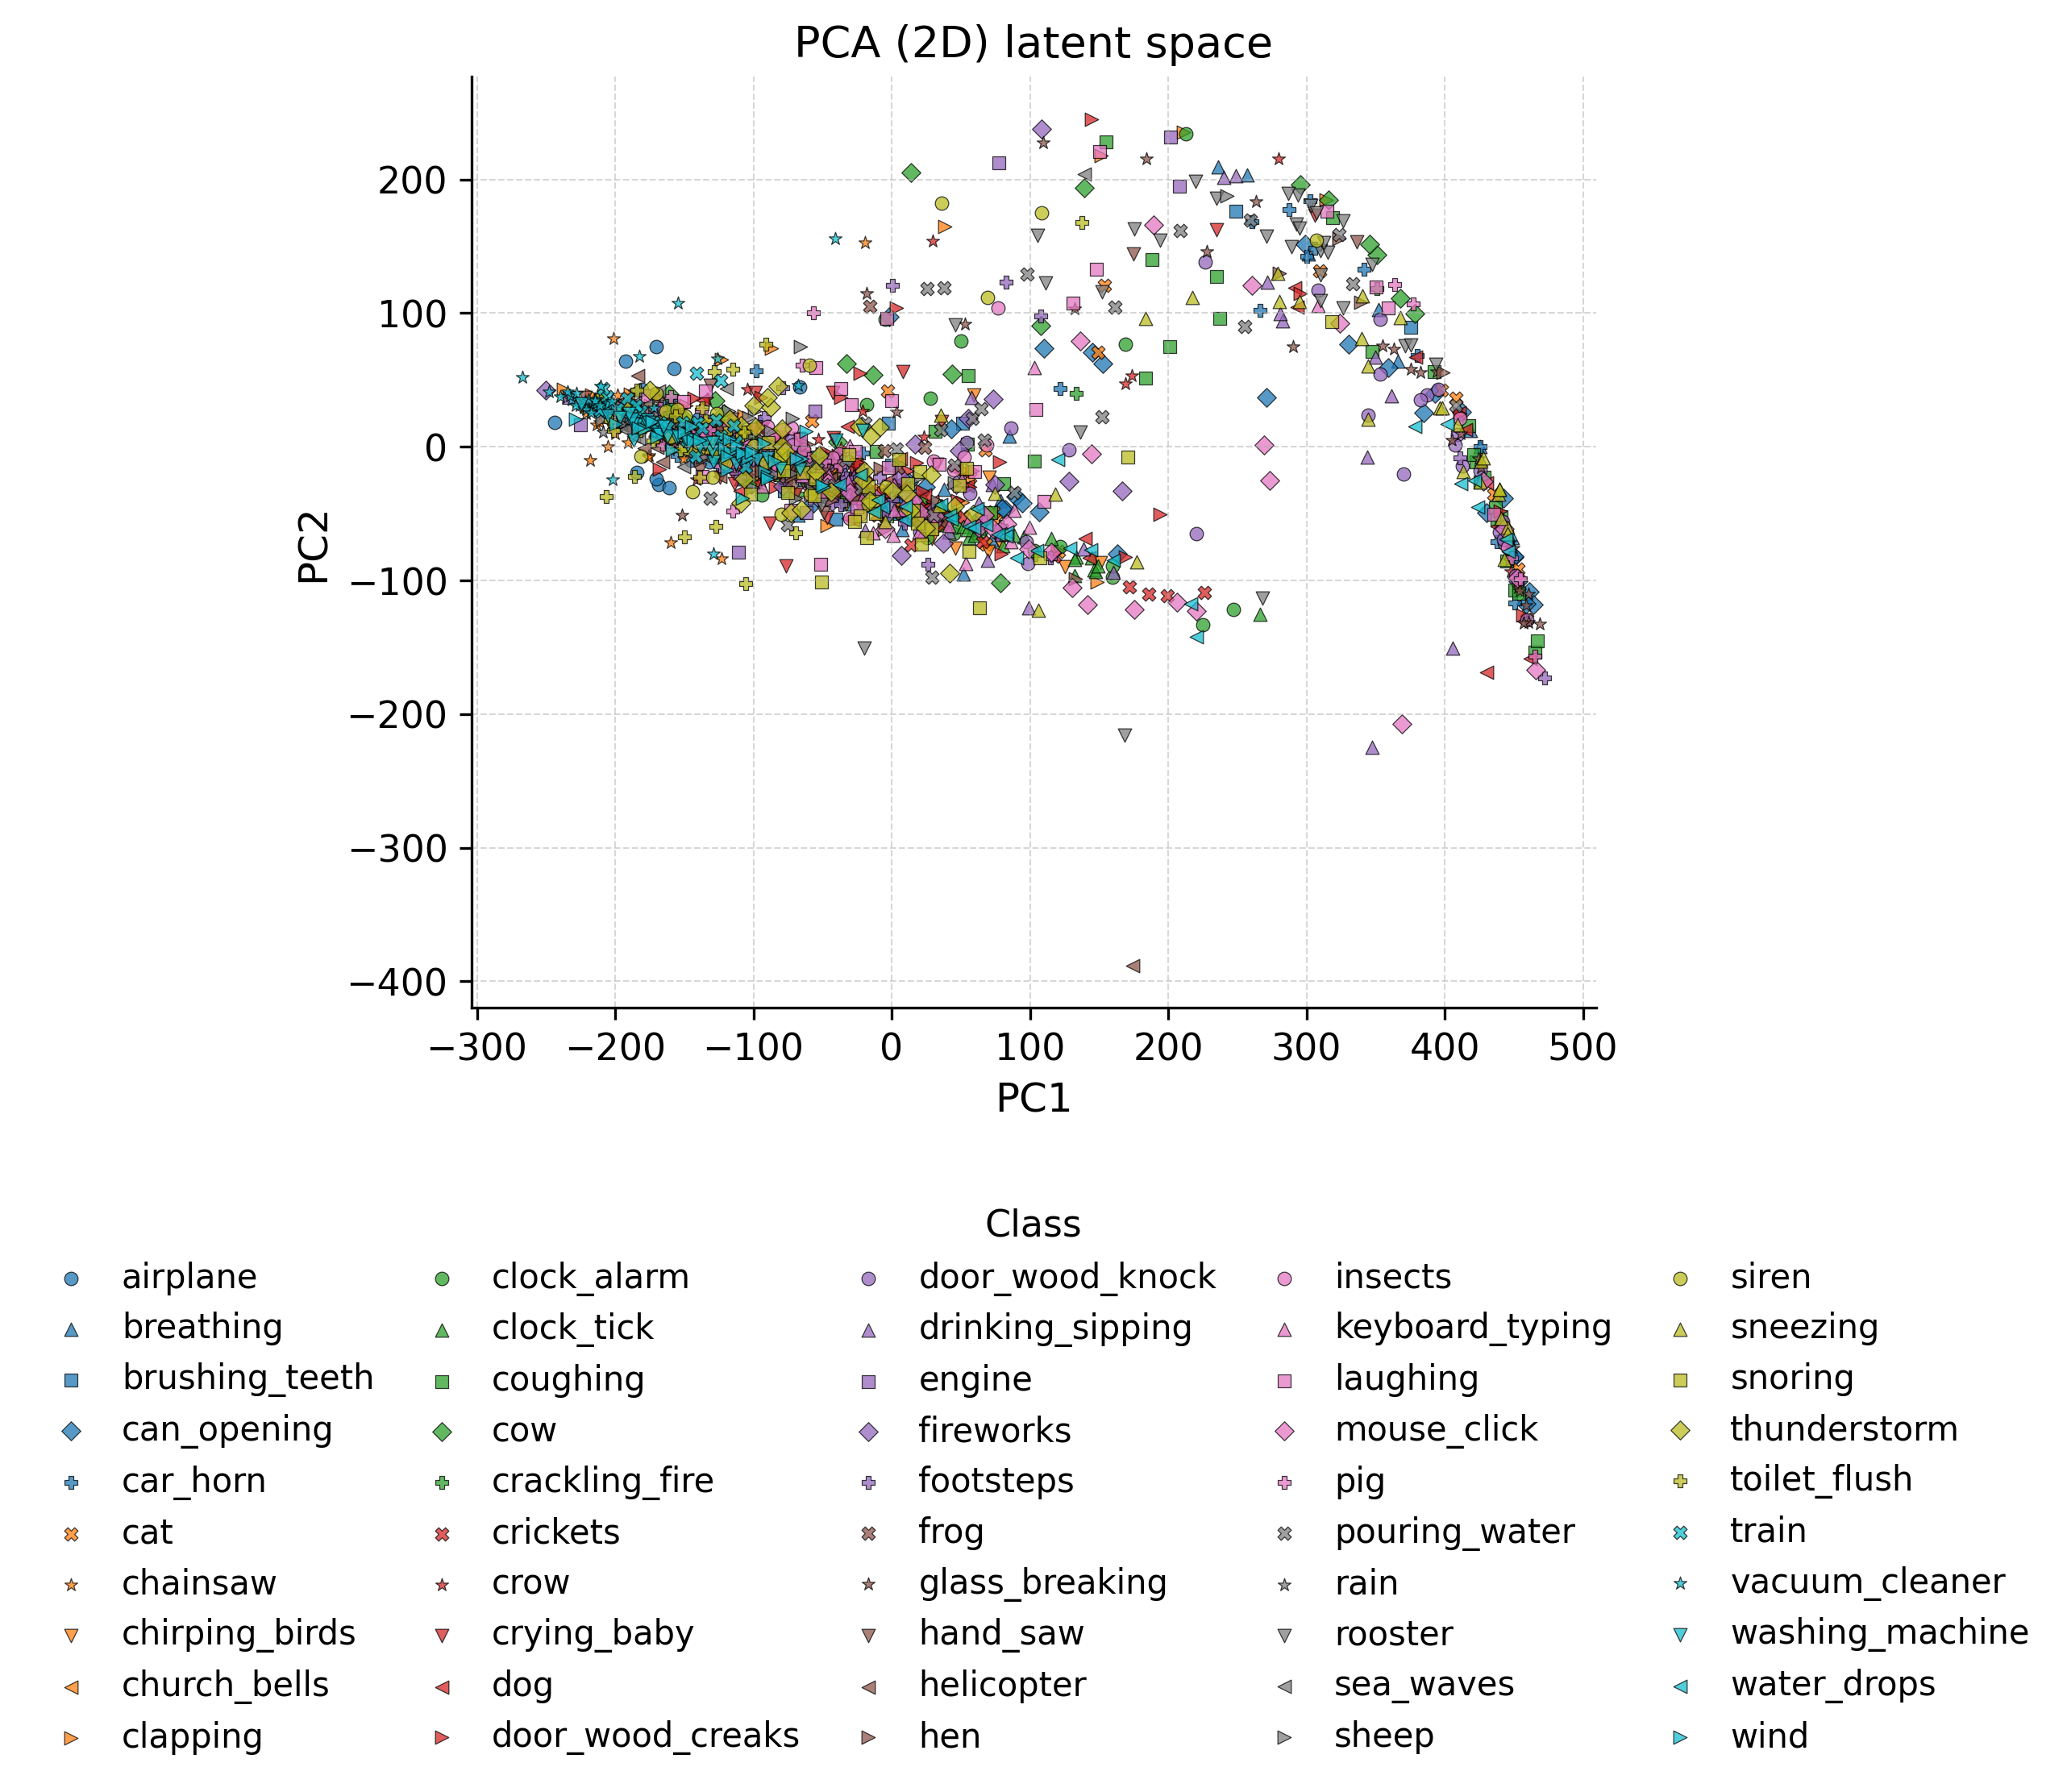

In [3]:
pca_visualization(X_normal, y_normal, 2)[1].plot()

(<Figure size 1800x1500 with 1 Axes>,
 <Axes3D: title={'center': 'PCA (3D) latent space'}, xlabel='PC1', ylabel='PC2', zlabel='PC3'>)

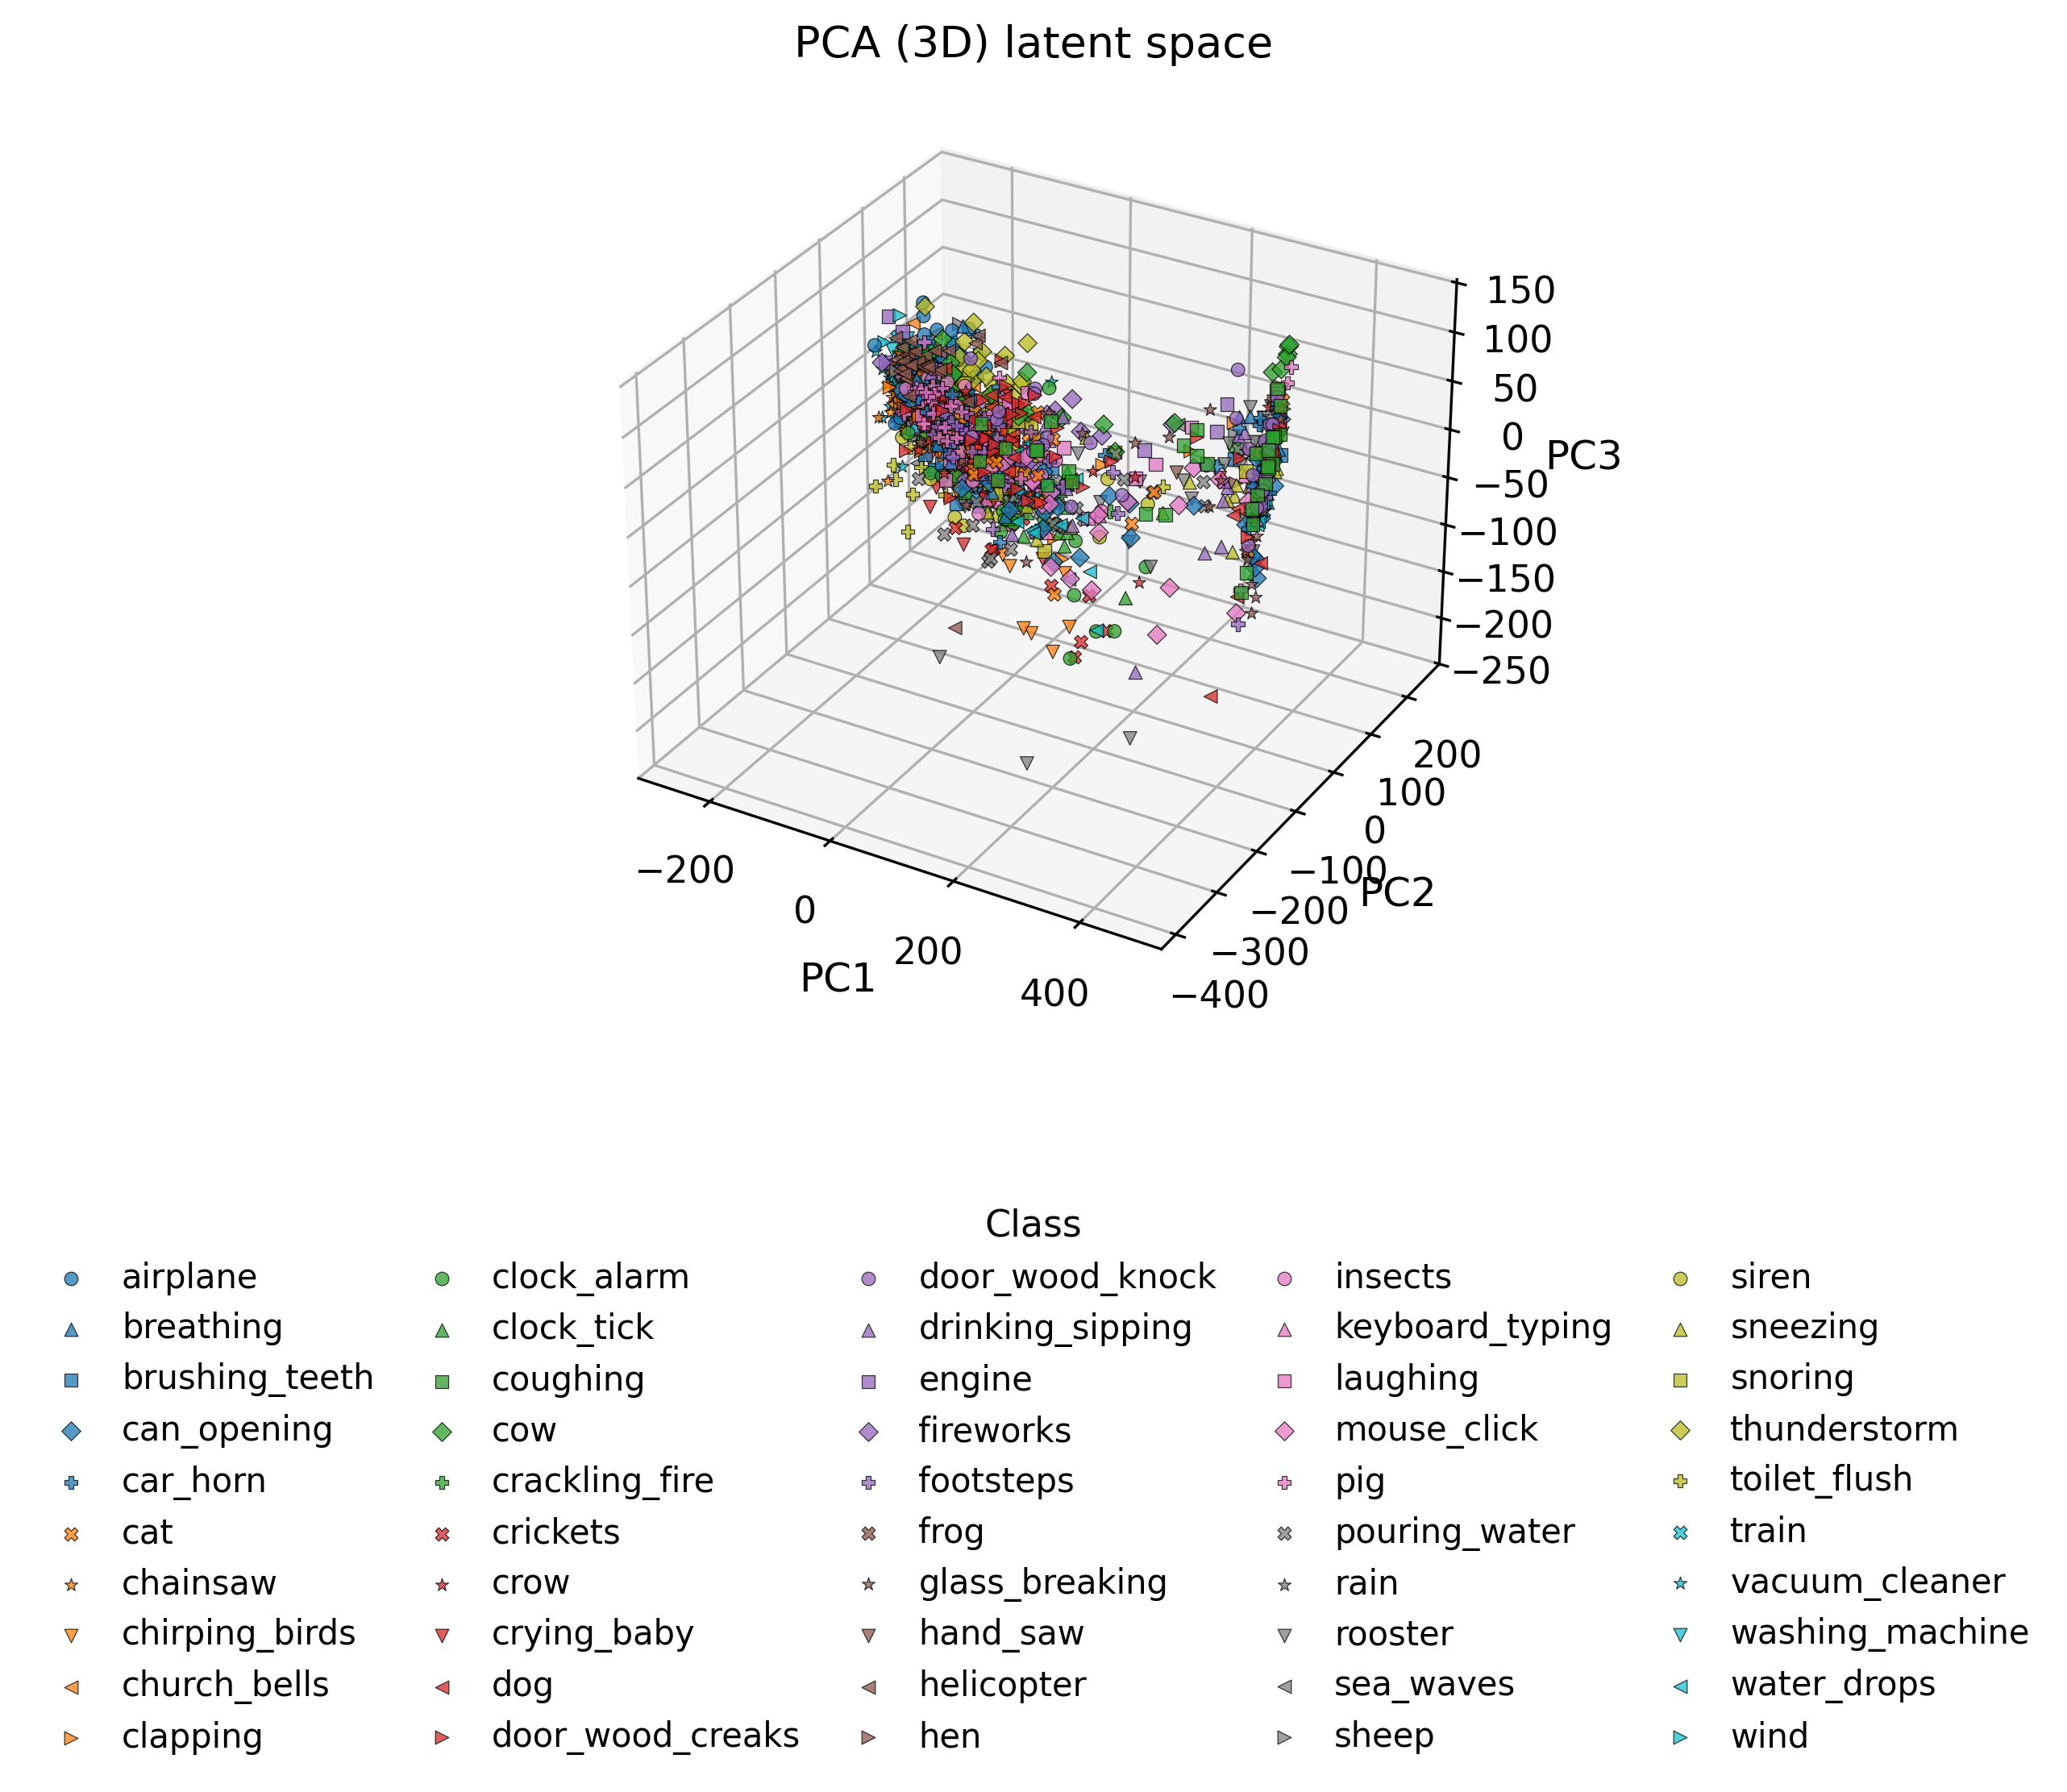

In [4]:
pca_visualization(X_normal, y_normal, 3)

(<Figure size 1800x1500 with 1 Axes>,
 <Axes: title={'center': 'PCA (2D) latent space'}, xlabel='PC1', ylabel='PC2'>)

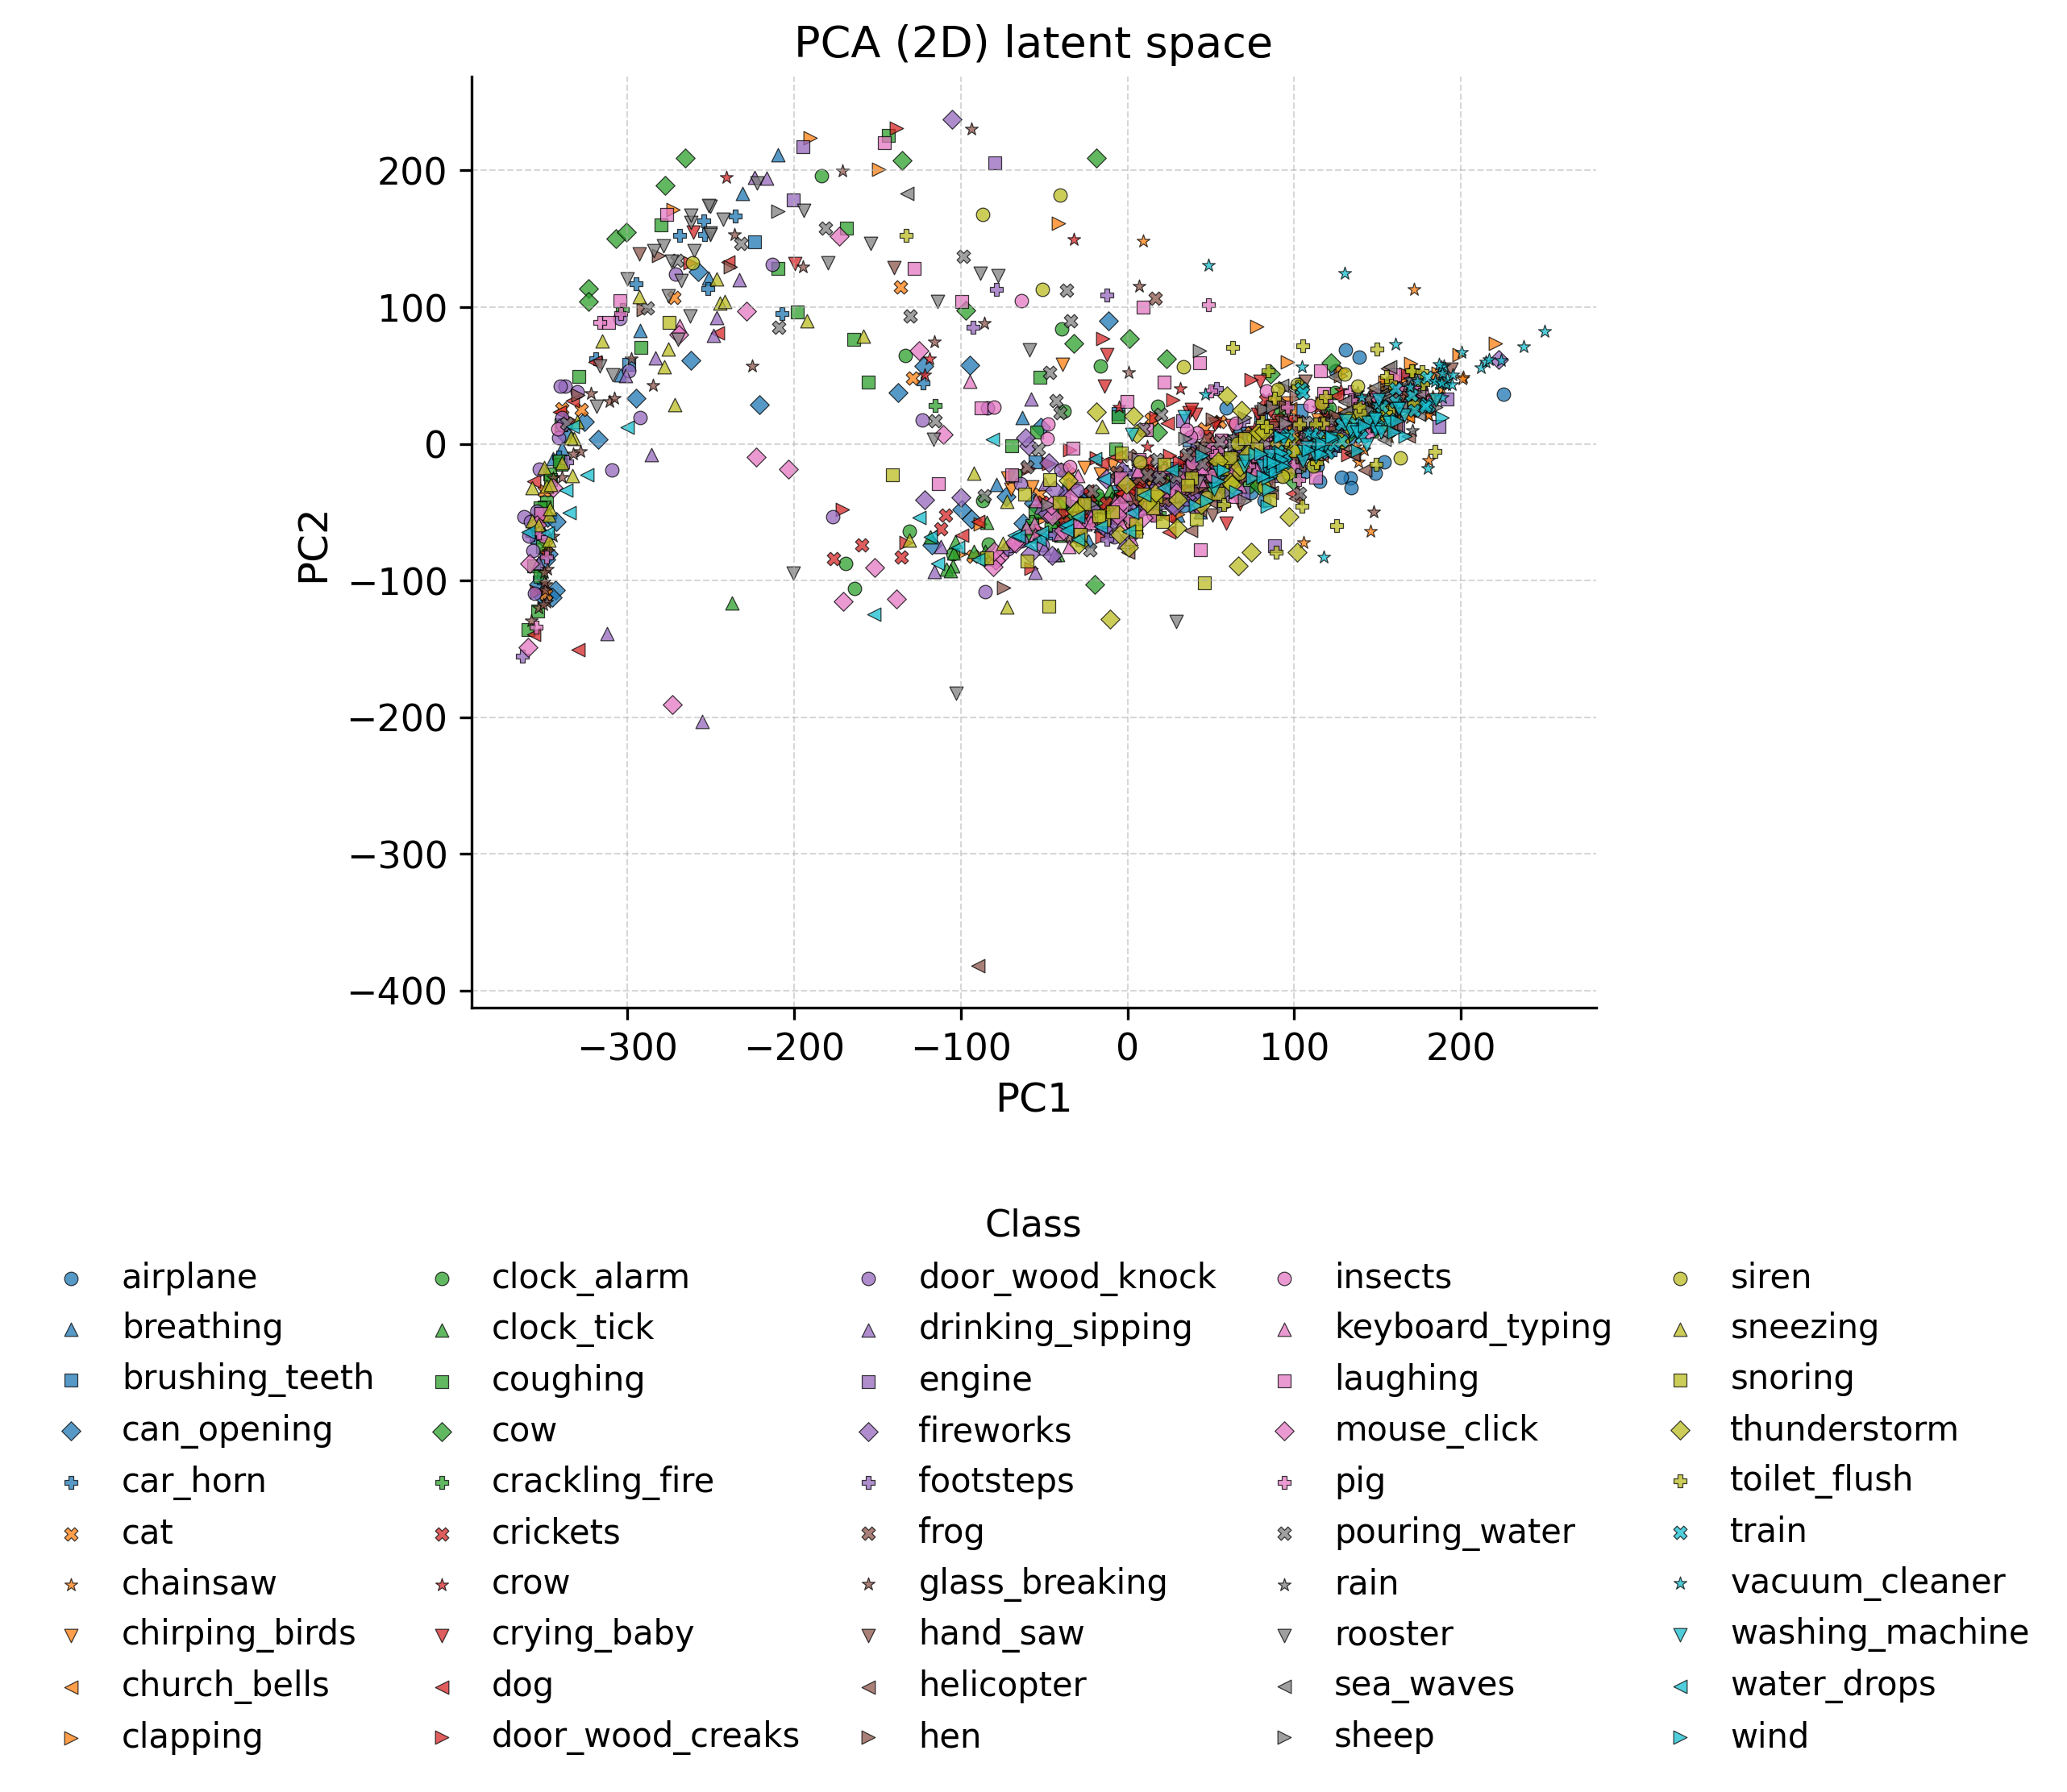

In [5]:
pca_visualization(X_noise, y_noise, 2)

(<Figure size 1800x1500 with 1 Axes>,
 <Axes3D: title={'center': 'PCA (3D) latent space'}, xlabel='PC1', ylabel='PC2', zlabel='PC3'>)

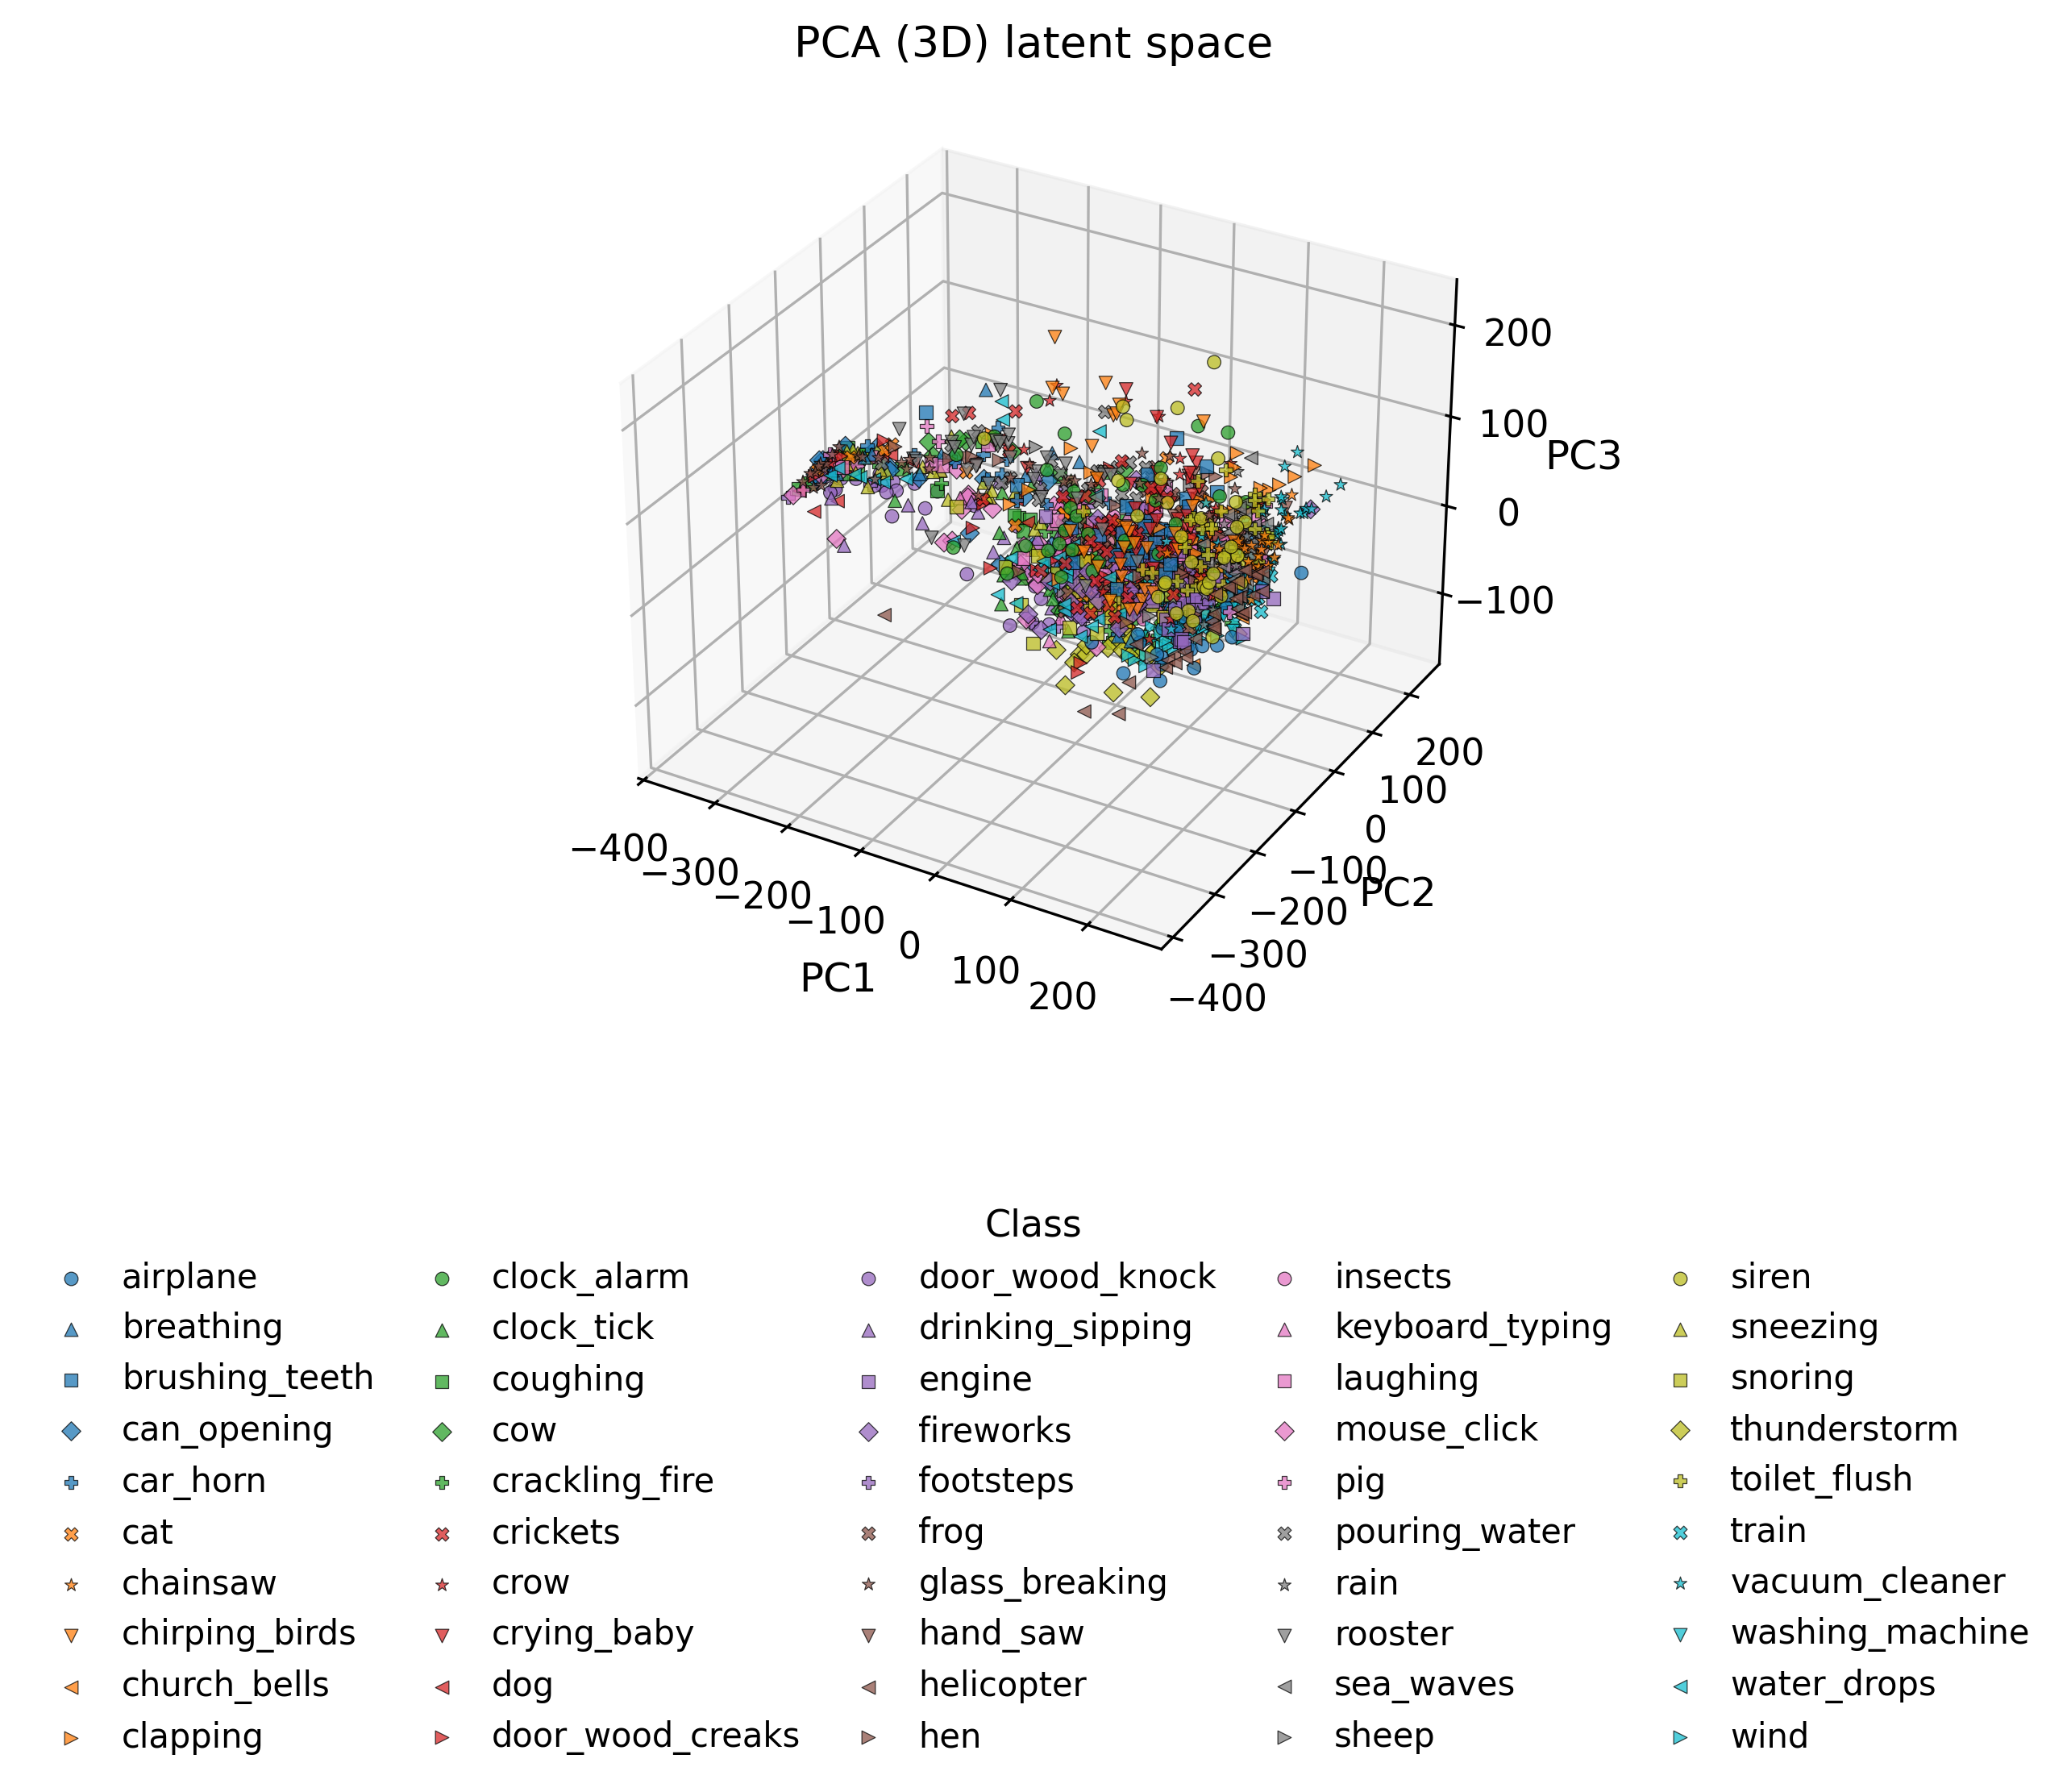

In [6]:
pca_visualization(X_noise, y_noise, 3)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# 需要导入 3D绘图支持
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 设置一些全局绘图参数
plt.rcParams.update({
    "font.size": 11,
    "legend.fontsize": 10,
})

def _add_class_legend(ax, labels, cmap, n_columns=5, is_3d=False):
    """
    辅助函数：添加类别的多列图例，根据 2D/3D 调整位置
    """
    class_handles = []
    for idx, label in enumerate(labels):
        color = cmap(idx)
        # 使用一个简单的实心方块来代表颜色图例
        handle = Line2D([0], [0], marker='s', color='w', markerfacecolor=color, 
                        markersize=8, label=str(label))
        class_handles.append(handle)

    # 根据是否是 3D 图调整图例位置参数
    if is_3d:
        # 3D图中，底部图例容易与坐标轴重叠，稍微往下移一点
        bbox_to_anchor = (0.5, -0.1) 
    else:
        bbox_to_anchor = (0.5, -0.15)

    # 创建第二个图例（类别图例）
    class_legend = ax.legend(
        handles=class_handles,
        title='Class Colors',
        loc='upper center',             
        bbox_to_anchor=bbox_to_anchor,
        ncol=n_columns,
        borderaxespad=0.,
        frameon=False,
        columnspacing=1.0,
        handletextpad=0.5,
        fontsize=9
    )
    return class_legend

def _add_model_legend(ax):
    """辅助函数：添加模型类型的图例（右上角）"""
    model_handles = [
        Line2D([0], [0], marker="o", linestyle="",
               color="k", label="AE normal (Filled)", markersize=6, markerfacecolor='k'),
        Line2D([0], [0], marker="o", linestyle="",
               color="k", label="AE + noise (Hollow)", markersize=6,
               markerfacecolor="none", markeredgecolor='k'),
    ]
    # 重要：保存这个图例对象
    model_legend = ax.legend(handles=model_handles, loc="upper right", 
                             frameon=True, title="Model Type")
    # 重要：手动将第一个图例加回坐标轴，防止被第二个图例覆盖
    ax.add_artist(model_legend)

# --- PCA 部分 ---

def pca_in_same_space(X_normal, X_noise, n_components=2, fit_on="concat"):
    # (代码保持不变)
    if fit_on == "normal":
        pca = PCA(n_components=n_components).fit(X_normal)
    elif fit_on == "noise":
        pca = PCA(n_components=n_components).fit(X_noise)
    elif fit_on == "concat":
        X_all = np.concatenate([X_normal, X_noise], axis=0)
        pca = PCA(n_components=n_components).fit(X_all)
    else:
        raise ValueError("fit_on must be 'normal', 'noise' or 'concat'")

    Z_normal = pca.transform(X_normal)
    Z_noise  = pca.transform(X_noise)
    return Z_normal, Z_noise, pca

def plot_two_models_pca(Z_normal, Z_noise, y_normal, y_noise, figsize=(8, 8)):
    # 检查维度
    n_dims = Z_normal.shape[1]
    is_3d = (n_dims == 3)
    
    labels = np.unique(np.concatenate([y_normal, y_noise]))
    n_classes = len(labels)
    cmap = plt.get_cmap("tab10", n_classes)

    fig = plt.figure(figsize=figsize, dpi=300)
    
    # 根据维度创建坐标轴
    if is_3d:
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = fig.add_subplot(111)

    # 绘图循环
    for idx, label in enumerate(labels):
        mask_n = (y_normal == label)
        mask_z = (y_noise  == label)
        color = cmap(idx)

        if is_3d:
            # --- 3D 绘图 ---
            # normal：实心点
            ax.scatter(
                Z_normal[mask_n, 0], Z_normal[mask_n, 1], Z_normal[mask_n, 2],
                s=20, alpha=0.6, color=color, marker="o", edgecolors="none"
            )
            # noise：空心点
            ax.scatter(
                Z_noise[mask_z, 0], Z_noise[mask_z, 1], Z_noise[mask_z, 2],
                s=25, alpha=0.8, facecolors="none", edgecolors=color, marker="o", linewidth=0.8
            )
        else:
            # --- 2D 绘图 ---
            # normal：实心点
            ax.scatter(
                Z_normal[mask_n, 0], Z_normal[mask_n, 1],
                s=20, alpha=0.6, color=color, marker="o", edgecolors="none"
            )
            # noise：空心点
            ax.scatter(
                Z_noise[mask_z, 0], Z_noise[mask_z, 1],
                s=25, alpha=0.8, facecolors="none", edgecolors=color, marker="o", linewidth=0.8
            )

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    if is_3d:
        ax.set_zlabel("PC3")
        ax.set_title(f"PCA (3D) latent space – same embedding")
    else:
        ax.set_title(f"PCA (2D) latent space – same embedding")
        ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)

    # --- 添加图例 ---
    # 1. 模型图例 (右上角)
    _add_model_legend(ax)
    
    # 2. 类别图例 (底部)
    _add_class_legend(ax, labels, cmap, n_columns=5, is_3d=is_3d)

    # 调整布局，为底部图例留出空间
    # 3D图通常需要更大的底部边距
    plt.subplots_adjust(bottom=0.25 if is_3d else 0.2)

    return fig, ax


# --- t-SNE 部分 ---

def tsne_in_same_space(X_normal, X_noise, n_components=2, perplexity=30, random_state=42):
    # (代码保持不变)
    X_all = np.concatenate([X_normal, X_noise], axis=0)
    n_normal = X_normal.shape[0]
    n_samples = X_all.shape[0]
    eff_perplexity = min(perplexity, max(5, (n_samples - 1) // 3))

    tsne = TSNE(
        n_components=n_components,
        perplexity=eff_perplexity,
        learning_rate="auto",
        init="pca",
        random_state=random_state,
        max_iter=1000,
    )
    Y_all = tsne.fit_transform(X_all)
    Y_normal = Y_all[:n_normal]
    Y_noise  = Y_all[n_normal:]
    return Y_normal, Y_noise, tsne

def plot_two_models_tsne(Y_normal, Y_noise, y_normal, y_noise, figsize=(8, 8)):
    # 检查维度
    n_dims = Y_normal.shape[1]
    is_3d = (n_dims == 3)
    
    labels = np.unique(np.concatenate([y_normal, y_noise]))
    n_classes = len(labels)
    cmap = plt.get_cmap("tab10", n_classes)

    fig = plt.figure(figsize=figsize, dpi=300)

    # 根据维度创建坐标轴
    if is_3d:
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = fig.add_subplot(111)

    for idx, label in enumerate(labels):
        mask_n = (y_normal == label)
        mask_z = (y_noise  == label)
        color = cmap(idx)

        if is_3d:
            # --- 3D 绘图 ---
            ax.scatter(
                Y_normal[mask_n, 0], Y_normal[mask_n, 1], Y_normal[mask_n, 2],
                s=20, alpha=0.6, color=color, marker="o", edgecolors="none"
            )
            ax.scatter(
                Y_noise[mask_z, 0], Y_noise[mask_z, 1], Y_noise[mask_z, 2],
                s=25, alpha=0.8, facecolors="none", edgecolors=color, marker="o", linewidth=0.8
            )
        else:
            # --- 2D 绘图 ---
            ax.scatter(
                Y_normal[mask_n, 0], Y_normal[mask_n, 1],
                s=20, alpha=0.6, color=color, marker="o", edgecolors="none"
            )
            ax.scatter(
                Y_noise[mask_z, 0], Y_noise[mask_z, 1],
                s=25, alpha=0.8, facecolors="none", edgecolors=color, marker="o", linewidth=0.8
            )

    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    if is_3d:
        ax.set_zlabel("t-SNE 3")
        ax.set_title(f"t-SNE (3D) latent space – same embedding")
    else:
        ax.set_title(f"t-SNE (2D) latent space – same embedding")
        ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)

    # --- 添加图例 ---
    _add_model_legend(ax)
    _add_class_legend(ax, labels, cmap, n_columns=5, is_3d=is_3d)

    plt.subplots_adjust(bottom=0.25 if is_3d else 0.2)
    return fig, ax

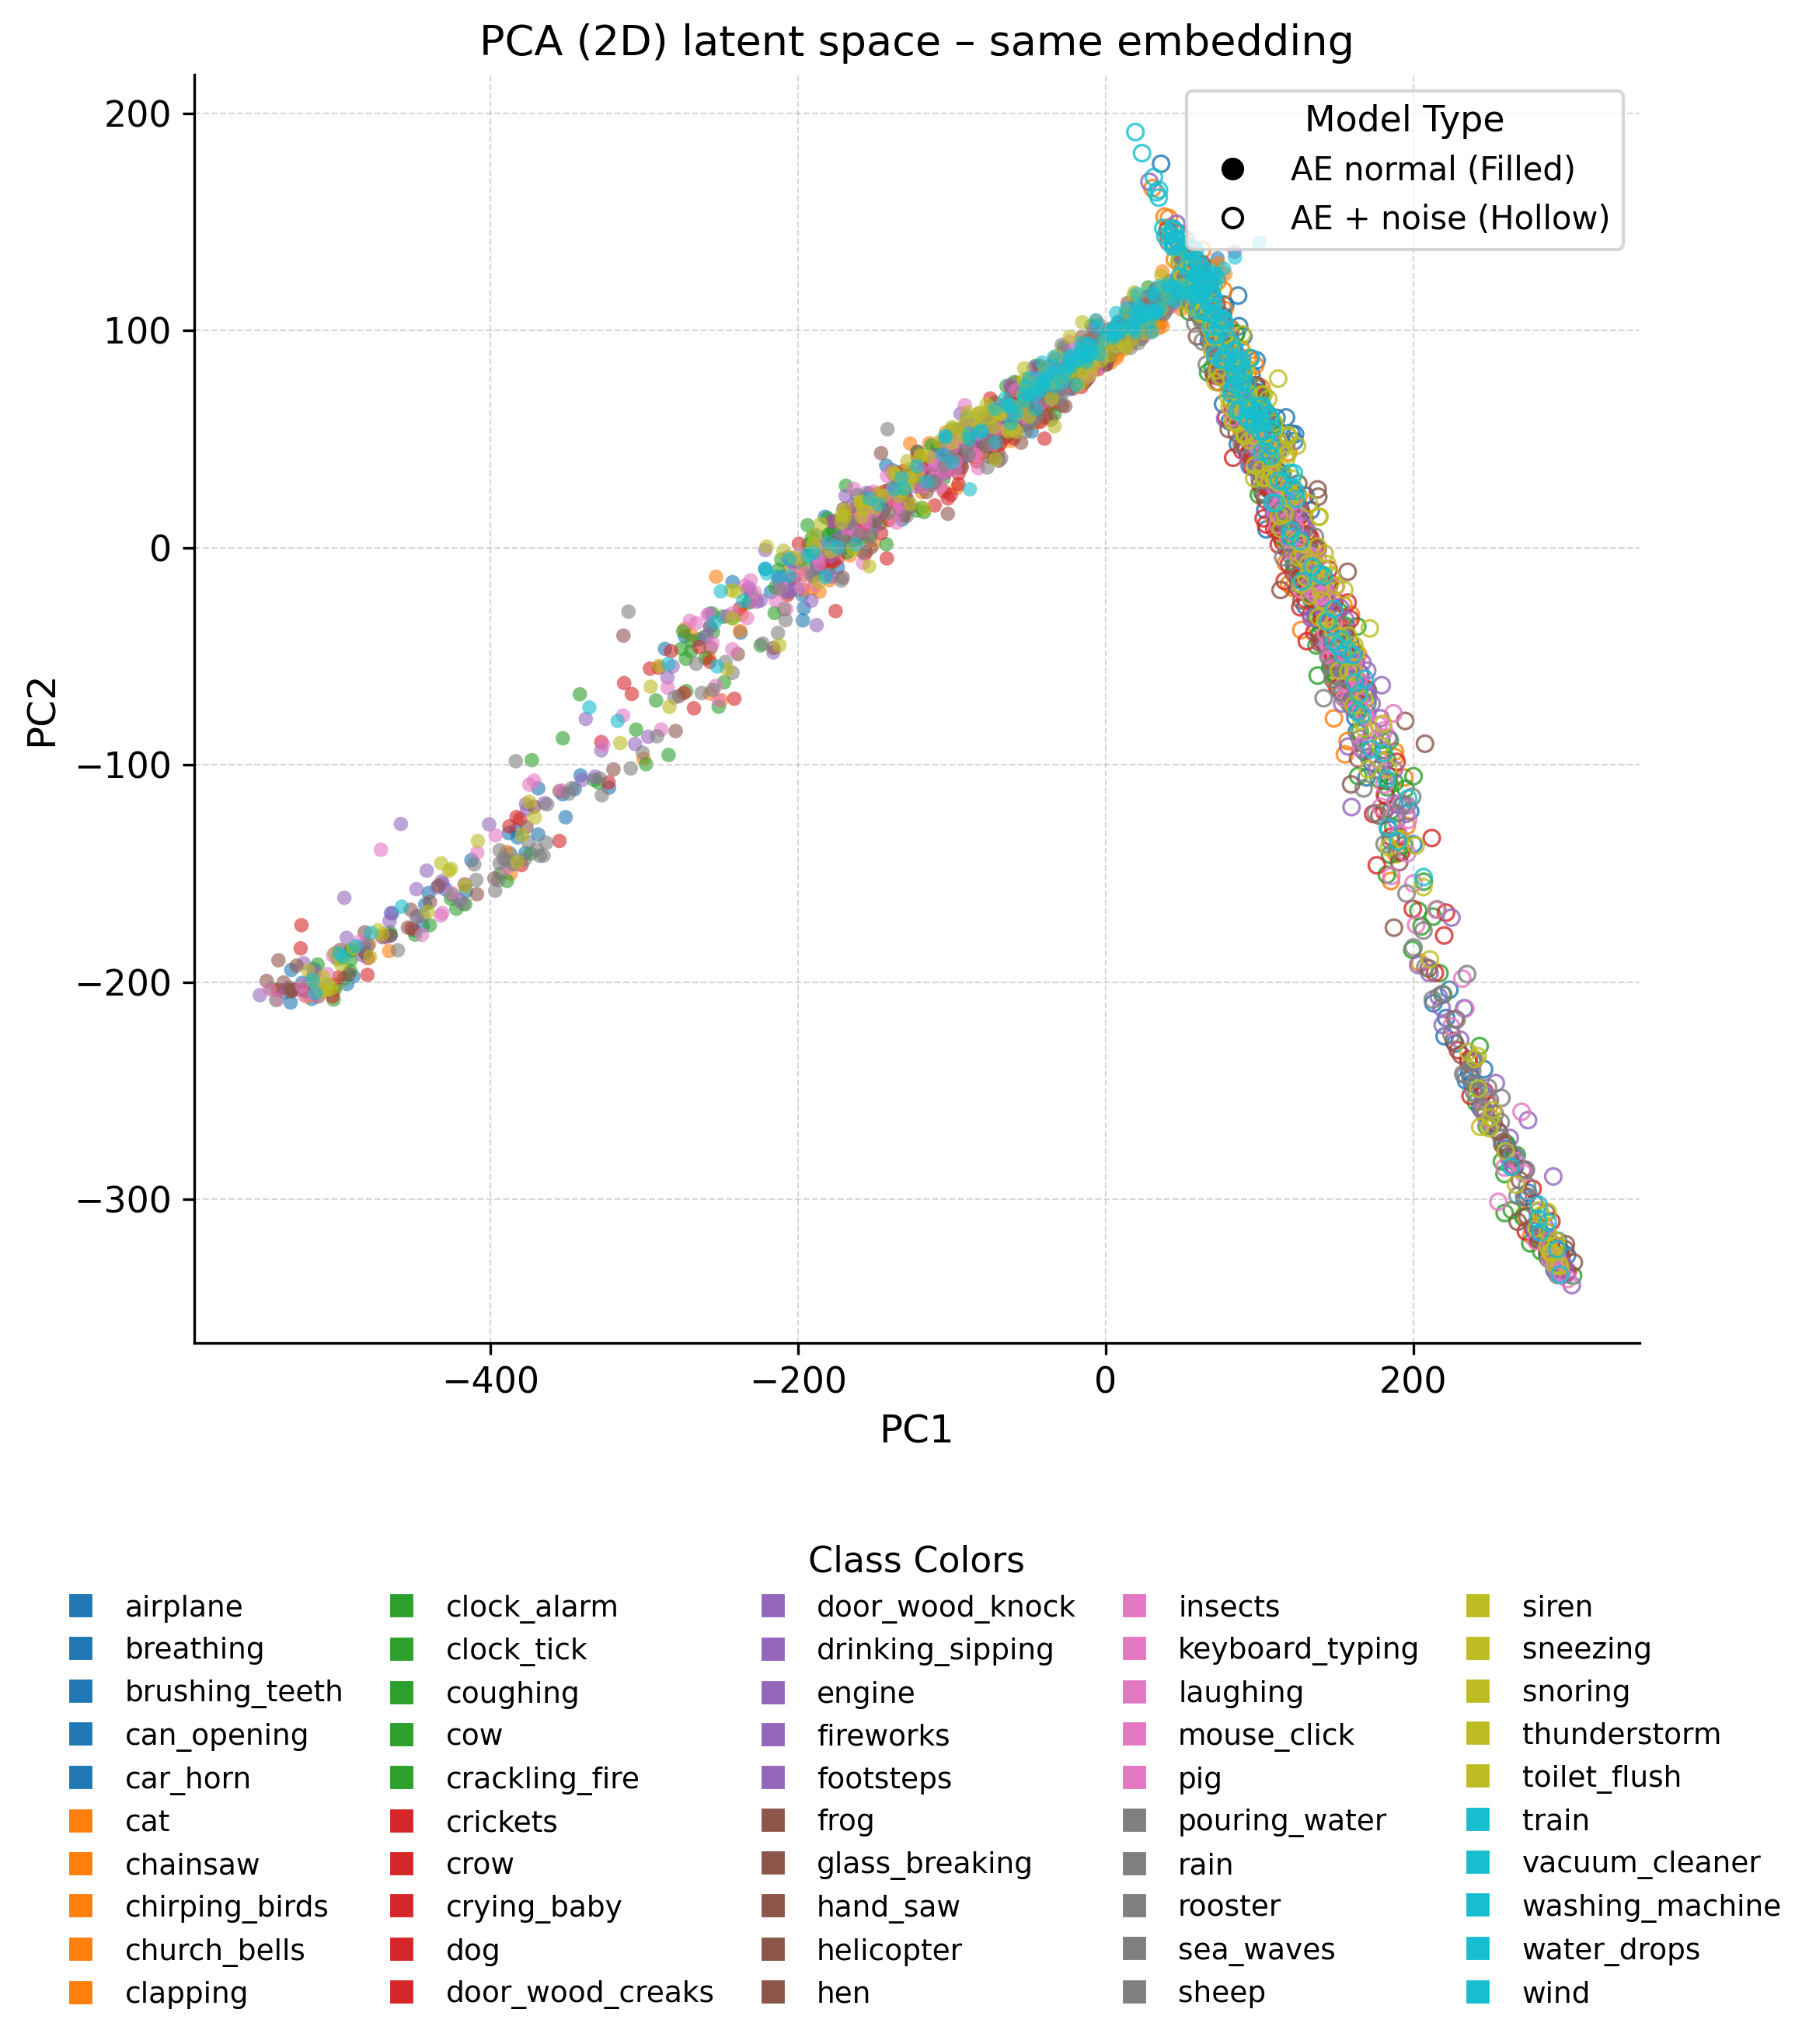

In [8]:
Z_n, Z_z, pca = pca_in_same_space(X_normal, X_noise, n_components=2, fit_on="concat")
fig, ax = plot_two_models_pca(Z_n, Z_z, y_normal, y_noise)

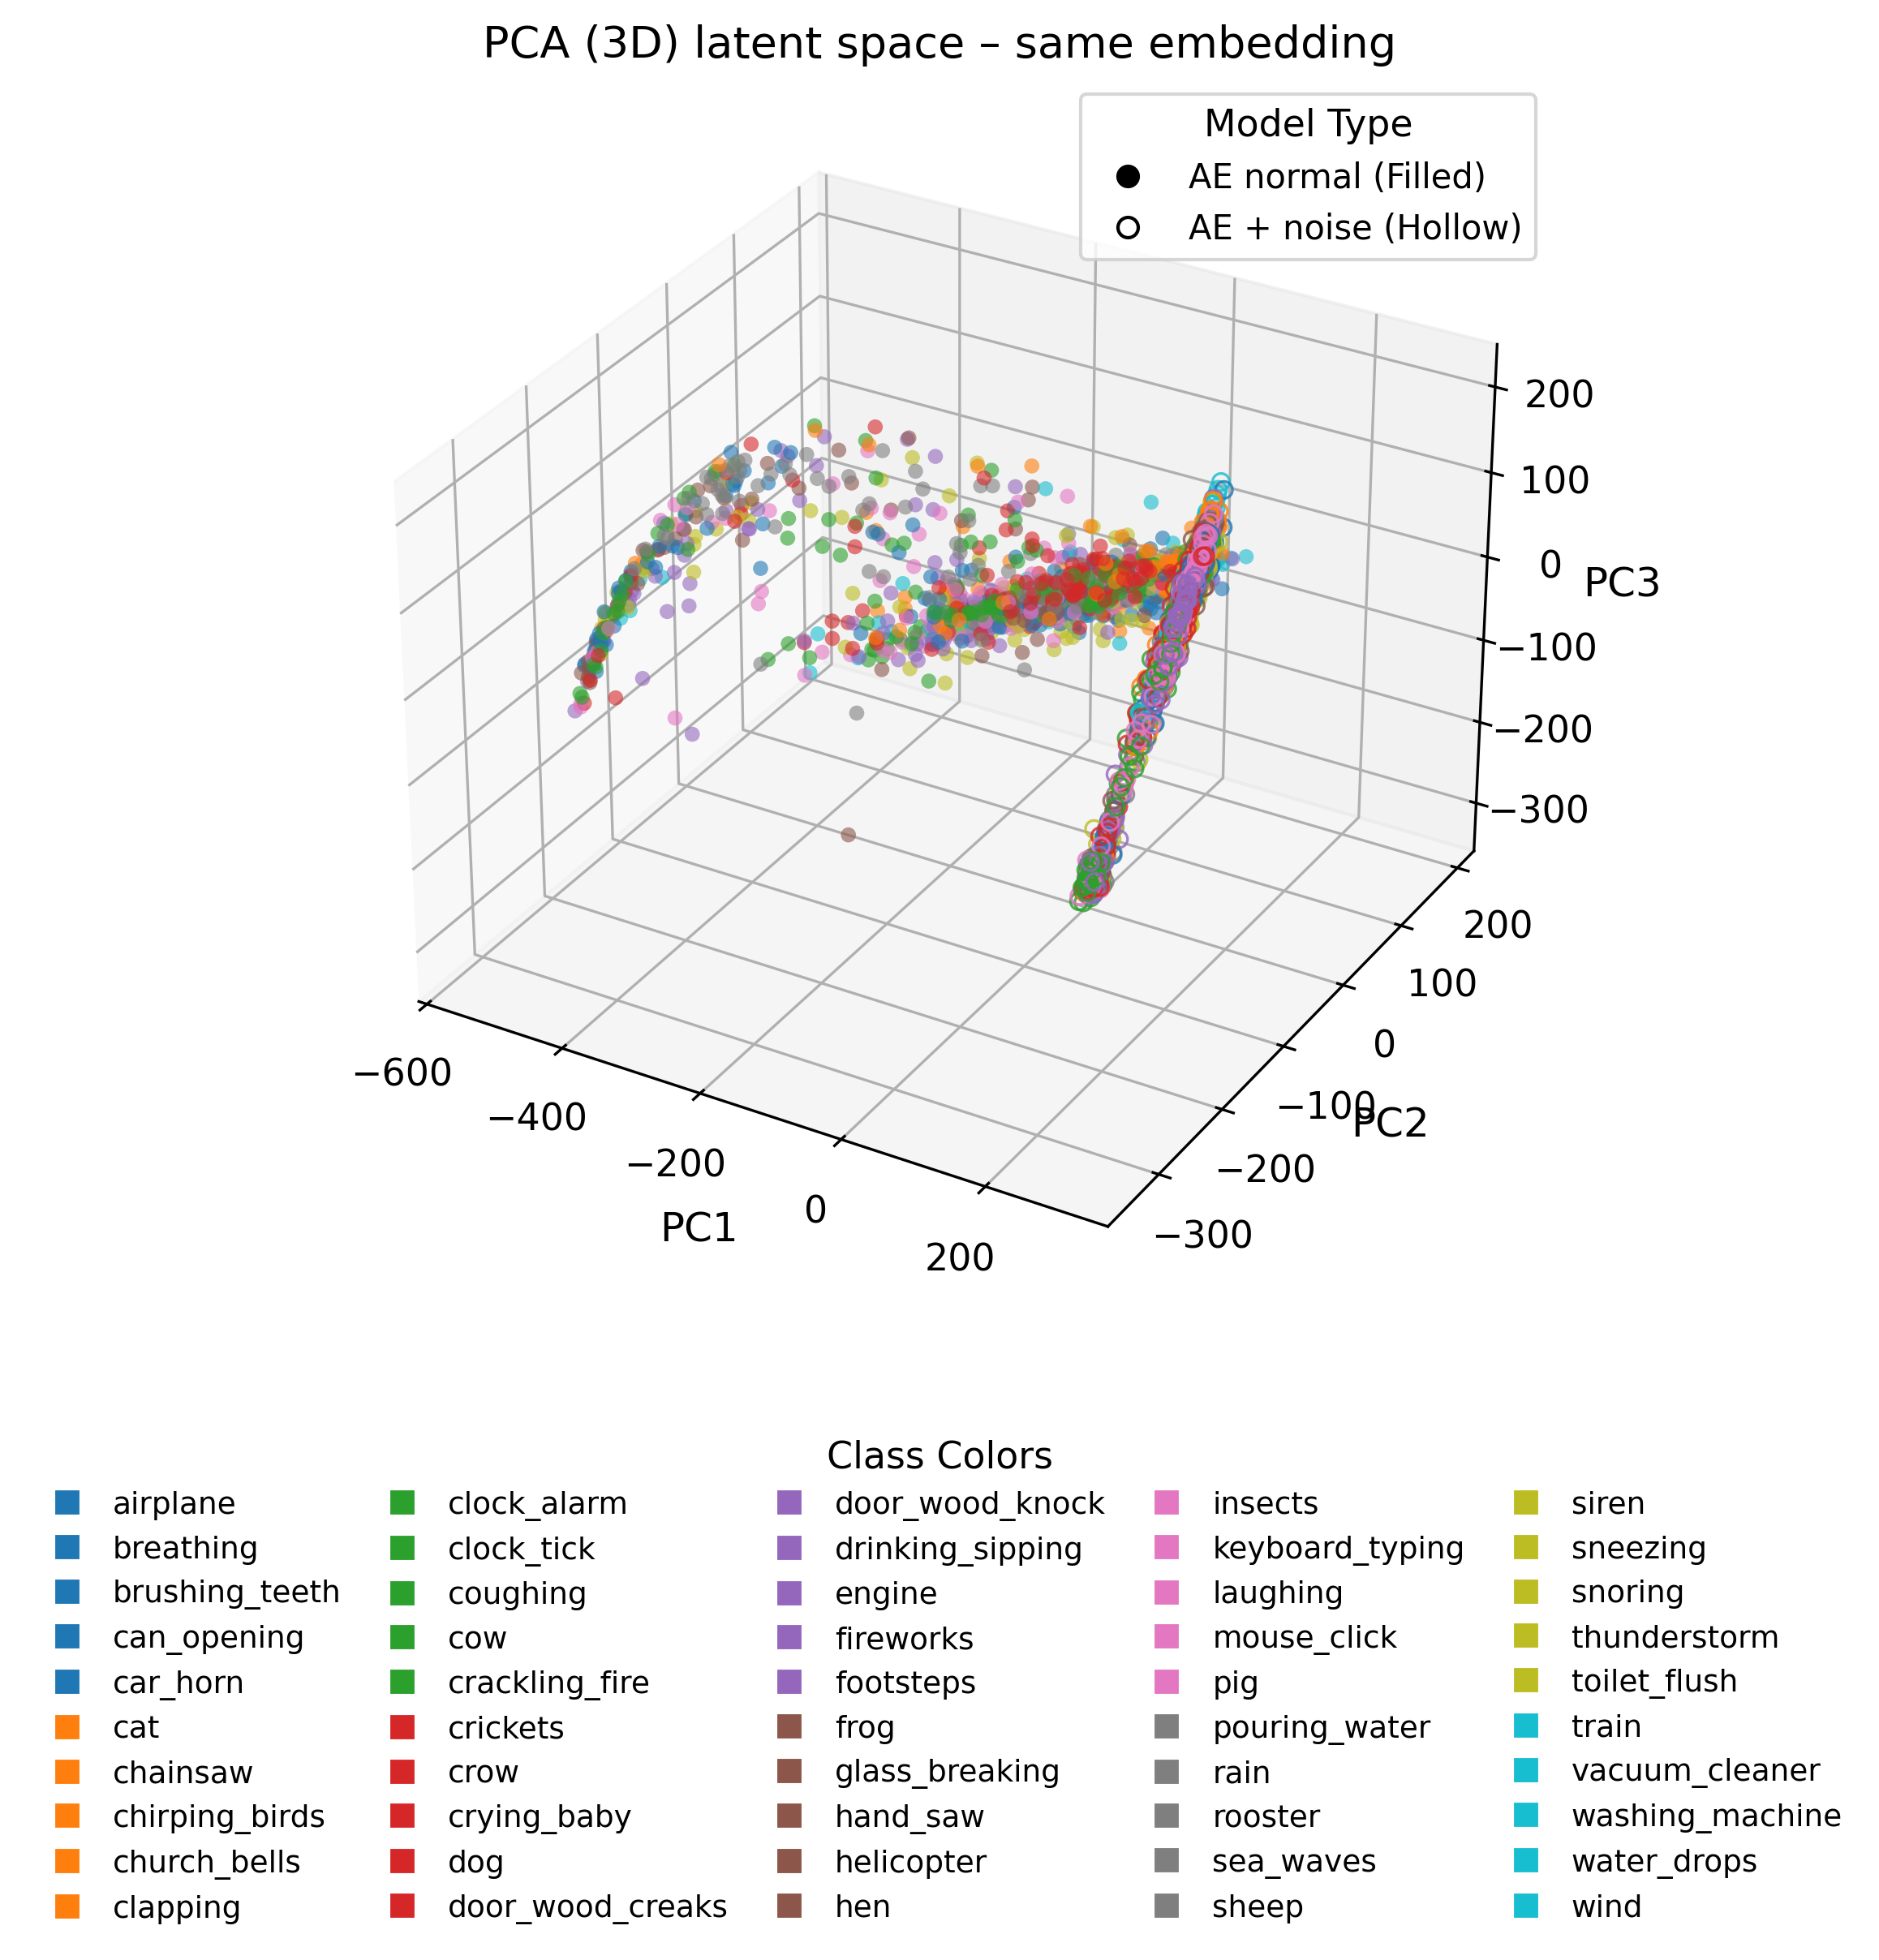

In [9]:
Z_n, Z_z, pca = pca_in_same_space(X_normal, X_noise, n_components=3, fit_on="concat")
fig, ax = plot_two_models_pca(Z_n, Z_z, y_normal, y_noise)

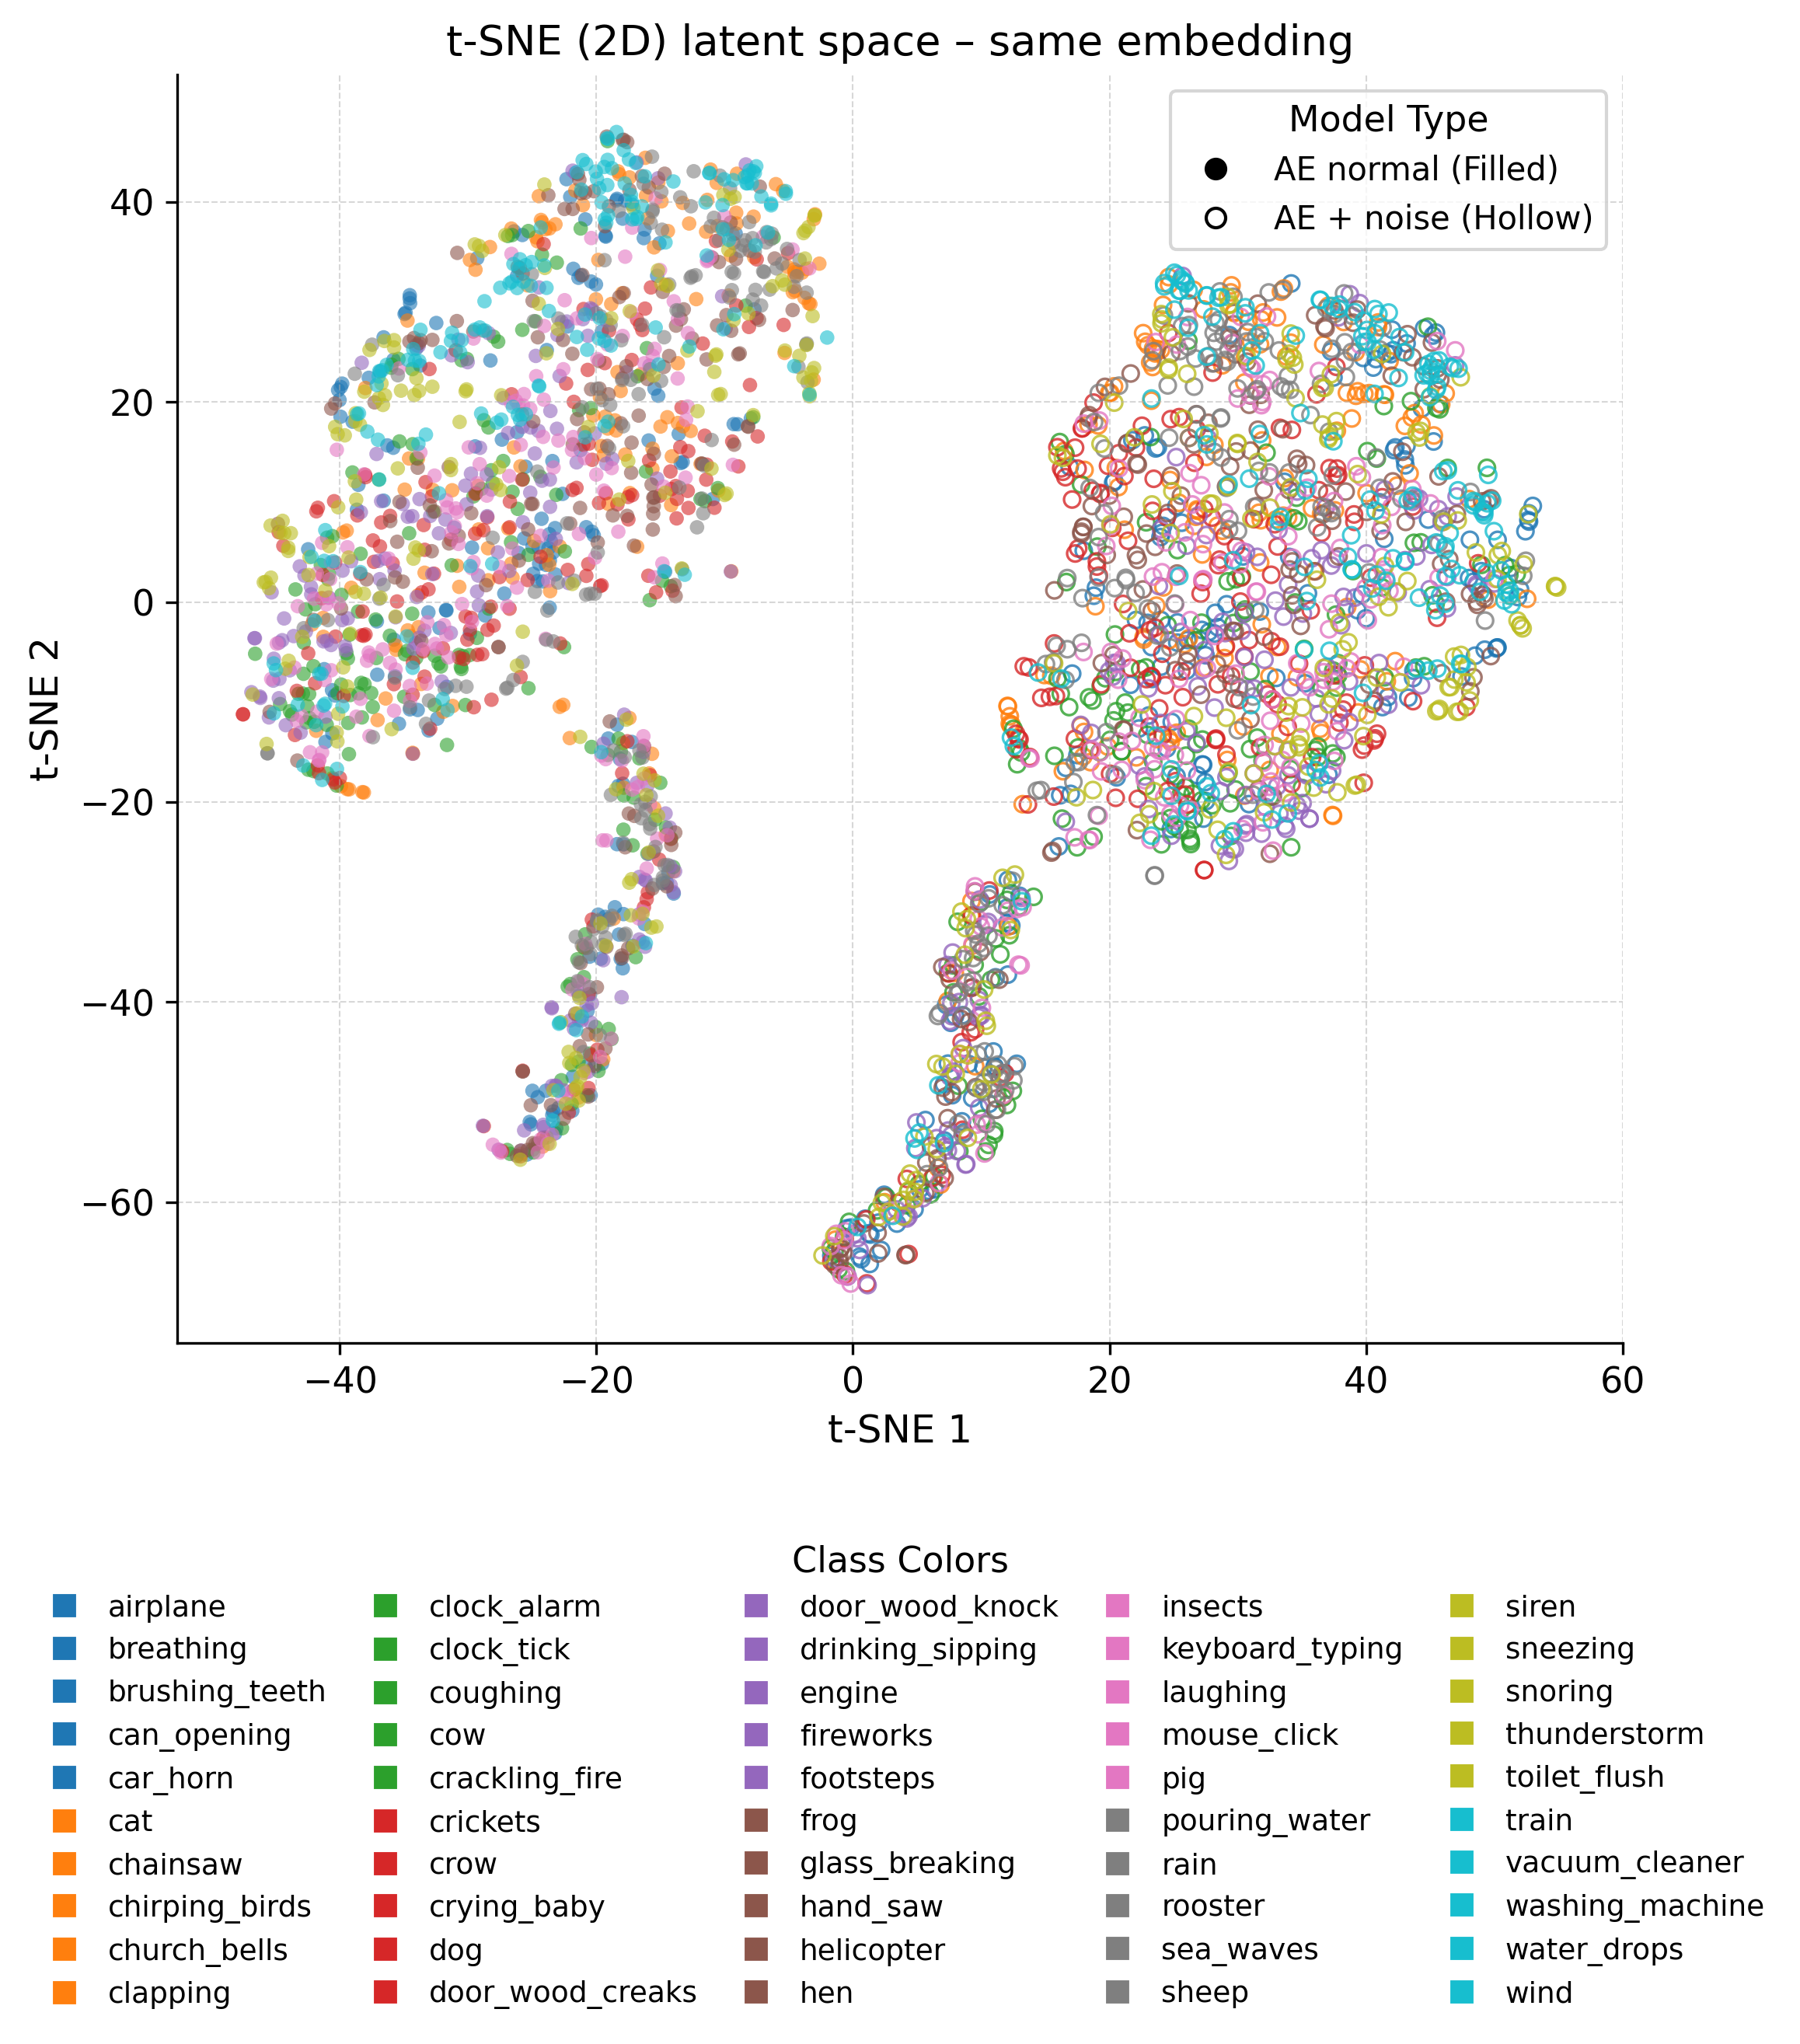

In [10]:
Y_n, Y_z, tsne = tsne_in_same_space(X_normal, X_noise, 2)
fig, ax = plot_two_models_tsne(Y_n, Y_z, y_normal, y_noise)

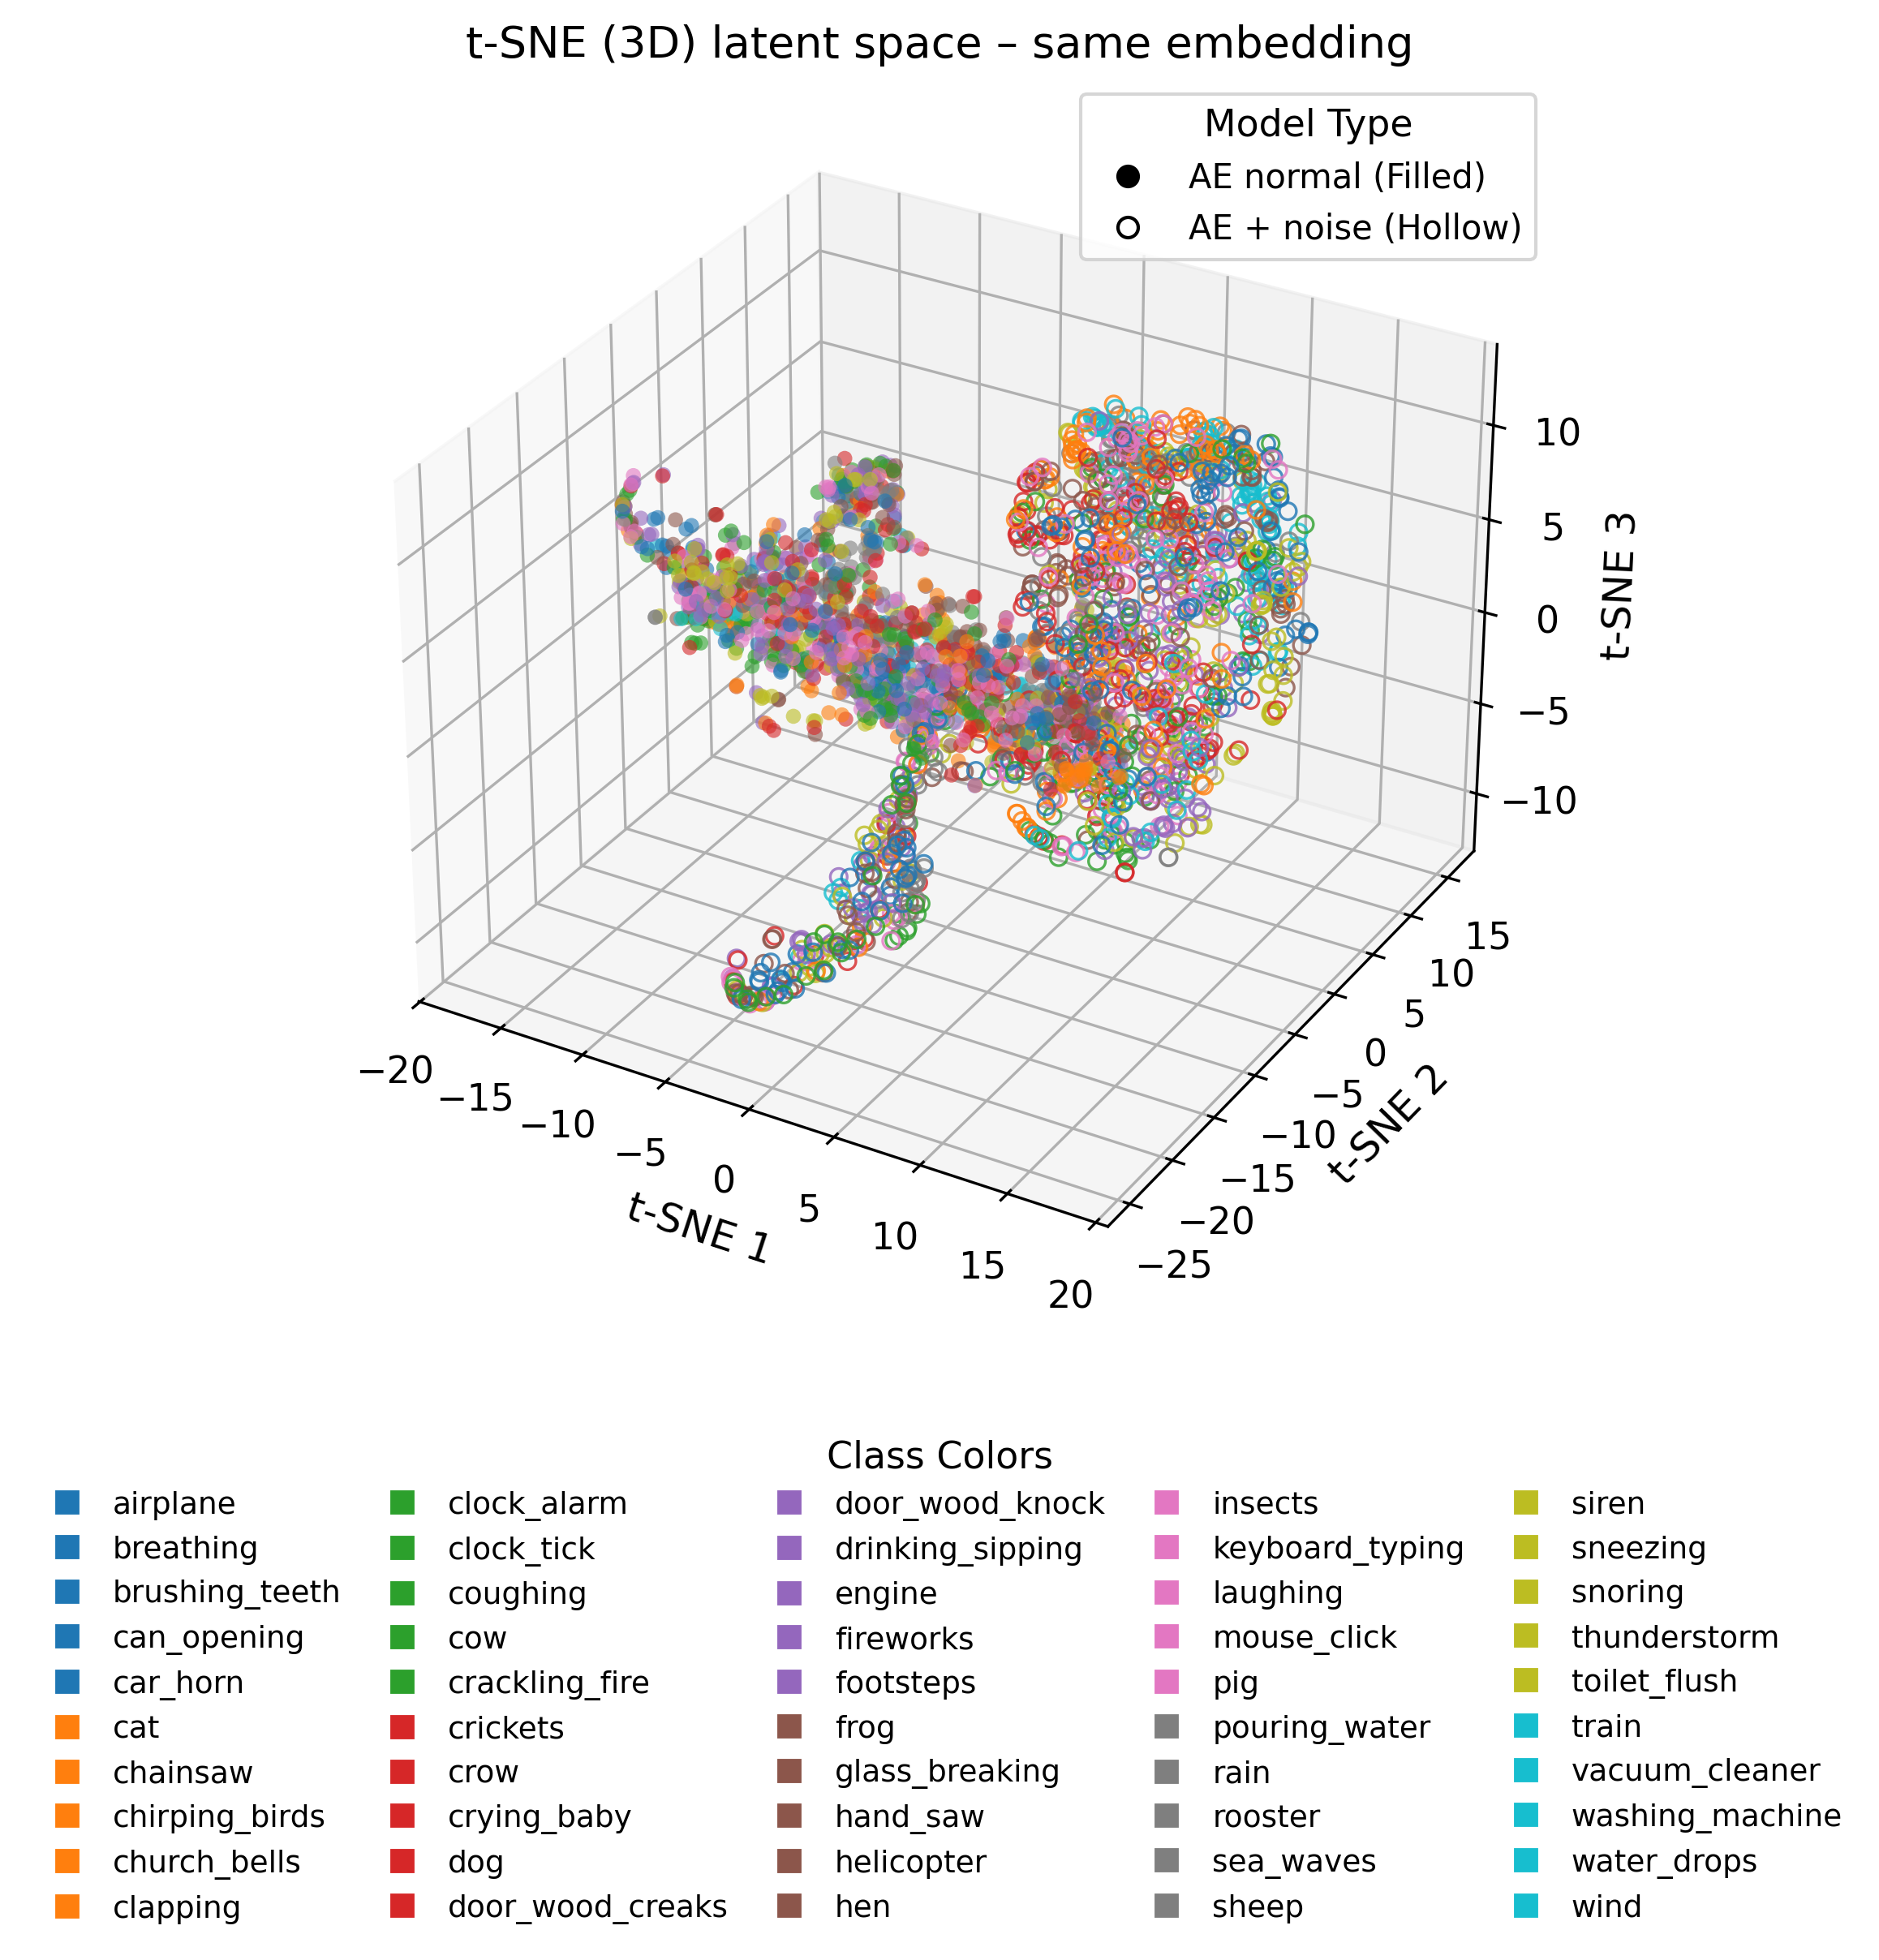

In [11]:
Y_n, Y_z, tsne = tsne_in_same_space(X_normal, X_noise, 3)
fig, ax = plot_two_models_tsne(Y_n, Y_z, y_normal, y_noise)

In [12]:
import numpy as np
import scipy.linalg
import warnings

def check_alignment_metrics(X_normal, X_noise):
    # 1. 安全检查：确保数据没有 NaN 或 Inf
    if not np.isfinite(X_normal).all() or not np.isfinite(X_noise).all():
        raise ValueError("输入数据包含 NaN 或 Infinity，请检查上一步的 Latent 提取代码！")

    # 2. 去均值
    X_normal_c = X_normal - X_normal.mean(axis=0, keepdims=True)
    X_noise_c  = X_noise - X_noise.mean(axis=0, keepdims=True)

    # 3. 使用 Scipy 专业的 Procrustes 函数
    # scipy 会返回最优旋转矩阵 R (orthogonal matrix) 和 scale (这里通常不需要)
    # 它的内部实现比手动 SVD 更稳定
    R, _ = scipy.linalg.orthogonal_procrustes(X_noise_c, X_normal_c)

    # 4. 计算误差
    # aligned_noise = (noise - mean) @ R + normal_mean
    # 但为了算误差，我们只需要比较中心化后的版本
    X_noise_aligned = X_noise_c @ R
    numerator = np.linalg.norm(X_normal_c - X_noise_aligned, 'fro')
    denominator = np.linalg.norm(X_normal_c, 'fro')
    error_rate = numerator / denominator

    # 5. 判断是否对称 (Reflection)
    # 对于正交矩阵 R，行列式只能是 +1 或 -1
    # 我们用 scipy.linalg.det，它比 numpy.linalg.det 在某些 backend 下更稳
    with warnings.catch_warnings():
        warnings.simplefilter("ignore") # 忽略计算过程中的浮点警告
        det_val = scipy.linalg.det(R)
    
    is_reflection = det_val < 0

    print(f"--- Alignment Report ---")
    print(f"Result Det : {det_val:.4f}")
    print(f"Symmetry   : {'Reflection (Mirror)' if is_reflection else 'Rotation (Normal)'}")
    print(f"Error Rate : {error_rate:.6f}")

    return det_val, error_rate


In [13]:
check_alignment_metrics(X_normal, X_noise)

--- Alignment Report ---
Result Det : -1.0000
Symmetry   : Reflection (Mirror)
Error Rate : 0.232811


(np.float64(-1.0000186906282713), np.float32(0.23281127))